## Conceitos e modelos complementares/ avançados de machine learning - exemplos

### Carregar os datasets e pre-processamento

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print(iris.data.shape)

(150, 4)


In [2]:
indices = np.random.permutation(len(iris.data))
iris_X_train = iris.data[indices[:-10]]
iris_y_train = iris.target[indices[:-10]]
iris_X_test = iris.data[indices[-10:]]
iris_y_test = iris.target[indices[-10:]]

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


In [4]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diab_X_train = diabetes.data[:-20]
diab_X_test = diabetes.data[-20:]
diab_y_train = diabetes.target[:-20]
diab_y_test = diabetes.target[-20:]

Standardização dos dados

In [5]:
from sklearn.preprocessing import StandardScaler
iris_scaler = StandardScaler()
iris_scaler.fit(iris_X_train)
iris_sc_X_train = iris_scaler.transform(iris_X_train)
iris_sc_X_test = iris_scaler.transform(iris_X_test)

## SVMs

In [6]:
from sklearn import svm

svm_iris = svm.SVC()
svm_iris = svm_iris.fit(iris_sc_X_train, iris_y_train)
print(svm_iris)

print("Valores previstos: " , svm_iris.predict(iris_sc_X_test))
print("Valores reais: " , iris_y_test)

SVC()
Valores previstos:  [2 2 1 0 0 1 2 1 1 2]
Valores reais:  [2 2 1 0 0 1 2 1 1 2]


SVC(C=100.0, gamma=0.001)
[8]
8


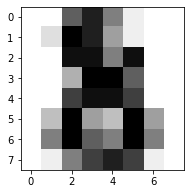

In [7]:
clf = svm.SVC(gamma=0.001, C=100.)
trData_inp = digits.data[:-1]
trData_out = digits.target[:-1]

svm_model = clf.fit(trData_inp, trData_out)
print(svm_model)
print(clf.predict([digits.data[-1]]))
print(digits.target[-1])

import matplotlib.pyplot as plt
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r,           
 interpolation='nearest')
plt.show()

In [8]:
from sklearn.svm import SVR
regr_svm = SVR(kernel = "linear", C = 100)
regr_svm = regr_svm.fit(diab_X_train, diab_y_train)
print(regr_svm)
pred_diab = regr_svm.predict(diab_X_test)
print("Valores previstos: " , pred_diab)
print("Valores reais: " , diab_y_test)


SVR(C=100, kernel='linear')
Valores previstos:  [179.61733446 155.31912079 163.87920841  99.89105685 170.29423186
 131.26891746 238.19169769 105.01797182 121.79320974 125.61703134
 201.03922698  76.71706683 134.10335922 120.75495582  65.2368481
 180.30941613 121.1293702  132.57166098 184.18155351  64.77051292]
Valores reais:  [233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


### Estimação do erro

In [9]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris.data, iris.target, test_size= 0.3)
print(iris_X_train.shape, iris_y_train.shape)
print(iris_X_test.shape, iris_y_test.shape)

svm_model = svm.SVC(kernel='linear', C=1)
svm_model.fit(iris_X_train, iris_y_train)
print(svm_model.score(iris_X_test, iris_y_test))


(105, 4) (105,)
(45, 4) (45,)
1.0


In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, iris.data, iris.target, cv = 5)
print(scores)
print(scores.mean())


[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.9800000000000001


In [11]:
print("Funcao scoring: F1")
scores_f1 = cross_val_score(svm_model, iris.data, y = iris.target, scoring = "f1_weighted", cv = 5)
print(scores_f1)
print(scores_f1.mean())


Funcao scoring: F1
[0.96658312 1.         0.96658312 0.96658312 1.        ]
0.9799498746867169


In [12]:
from sklearn.model_selection import LeaveOneOut
loo_cv = LeaveOneOut()
scores_loo = cross_val_score(svm_model, iris.data, iris.target, cv=loo_cv)

print(scores_loo.mean())


0.98


In [13]:
regr_model1 = SVR()
scores_r2 = cross_val_score(regr_model1, diabetes.data, y = diabetes.target, scoring = "r2", cv = 5)
print(scores_r2)
print(scores_r2.mean())

[0.14739166 0.12560752 0.18203803 0.12242334 0.15658678]
0.14680946577304238


In [14]:
regr_model2 = SVR(kernel = "linear")
scores_r2_2 = cross_val_score(regr_model2, diabetes.data, y = diabetes.target, scoring = "r2", cv = 5)
print(scores_r2_2)
print(scores_r2_2.mean())

[-0.00149039 -0.06184001  0.00870314 -0.03402417 -0.01126642]
-0.019983570466736444


In [15]:
regr_model3 = SVR(kernel = "linear", C = 100)
scores_r2_3 = cross_val_score(regr_model3, diabetes.data, y = diabetes.target, scoring = "r2", cv = 5)
print(scores_r2_3)
print(scores_r2_3.mean())

[0.38527112 0.4772064  0.46589587 0.43557539 0.47379338]
0.44754843144591316


In [16]:
scores_mse = cross_val_score(estimator = regr_model3, X= diabetes.data, y= diabetes.target, scoring= "neg_mean_squared_error", cv= 5)
print (scores_mse)
scores_mad = cross_val_score(estimator = regr_model3, X= diabetes.data, scoring = "neg_mean_absolute_error", y= diabetes.target, cv= 5)
print (scores_mad)


[-2995.73609754 -3316.82913438 -3342.73590218 -2961.12281127
 -3404.93054379]
[-44.31909878 -45.48850766 -49.78554522 -44.36873269 -47.95313532]


In [17]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits = 30, test_size=0.3)
scores_ss1 = cross_val_score(regr_model1, diabetes.data, y = diabetes.target, scoring = "r2", cv = ss)
print ("Media modelo RBF: ", scores_ss1.mean())
print ("Desvio padrao modelo RBF:", scores_ss1.std())

scores_ss2 = cross_val_score(regr_model3, diabetes.data, y = diabetes.target, scoring = "r2", cv = ss)
print ("Media modelo Linear: ",scores_ss2.mean())
print ("Desvio padrao modelo Linear:",scores_ss2.std())

Media modelo RBF:  0.13281190620785324
Desvio padrao modelo RBF: 0.038594915354014346
Media modelo Linear:  0.4417239577095945
Desvio padrao modelo Linear: 0.037895102666974295


### Ensembles

Bagging

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

bagged_model = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

scores_bag = cross_val_score(bagged_model, iris.data, iris.target, cv = 5)
print (scores_bag)


[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]


In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

bagged_model2 = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

scores_bag2 = cross_val_score(bagged_model2, iris.data, iris.target, cv = 5)

print(scores_bag2)

[0.96666667 0.96666667 0.9        0.93333333 0.93333333]


Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)

scores_rf = cross_val_score(rf_model, iris.data, iris.target, cv = 5)

print (scores_rf)
print (scores_rf.mean())

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_regr = RandomForestRegressor()

scores_rf2 = cross_val_score(rf_regr, diabetes.data, diabetes.target, cv = 5)

print (scores_rf2)
print (scores_rf2.mean())

[0.34024353 0.50669595 0.42497514 0.36762542 0.42902397]
0.41371280191290427


Exemplos com boosting

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ada_tree = AdaBoostClassifier(n_estimators=100)

scores_ada = cross_val_score(ada_tree, iris.data, iris.target, cv = 5)

print (scores_ada)
print (scores_ada.mean())

[0.96666667 0.93333333 0.93333333 0.9        1.        ]
0.9466666666666665


In [23]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=100)

scores_ada_reg = cross_val_score(ada_reg, diabetes.data, diabetes.target, cv = 5)

print (scores_ada_reg)
print (scores_ada_reg.mean())

[0.38894375 0.47685632 0.41545755 0.34264877 0.42196293]
0.4091738622092859


Gradient boosting

In [24]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(diab_X_train, diab_y_train)
mse = mean_squared_error(diab_y_test, clf.predict(diab_X_test))
print("MSE: %.1f" % mse)

scores_r2 = cross_val_score(estimator = clf, X= diabetes.data, scoring = "r2", y = diabetes.target)
print(scores_r2)
print(scores_r2.mean())

MSE: 2383.6
[0.36776872 0.4967016  0.39154611 0.32516094 0.40390455]
0.3970163825004532


Voting classifiers

In [25]:
## classificadores distintos; votação simples
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

iris_scaler = StandardScaler()
iris_scaler.fit(iris.data)
iris_sc = iris_scaler.transform(iris.data)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic', "RF", "NB", 'Ensemble']):
    scores = cross_val_score(clf, iris_sc, iris.target, cv=5, scoring='accuracy')
    print("Accur.: %0.2f (std %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accur.: 0.96 (std 0.04) [Logistic]
Accur.: 0.97 (std 0.02) [RF]
Accur.: 0.95 (std 0.03) [NB]
Accur.: 0.95 (std 0.03) [Ensemble]


In [26]:
## classificadores distintos; votação com pesos
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_sc, iris.target, test_size= 0.3)

clf4 = DecisionTreeClassifier(max_depth=4)
clf5 = KNeighborsClassifier(n_neighbors=7)
clf6 = SVC(gamma='scale', kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf4), ('knn', clf5), ('svc', clf6)], voting='soft', weights=[1, 2, 3])

eclf = eclf.fit(iris_X_train, iris_y_train)
print(eclf.score(iris_X_test, iris_y_test))

0.9555555555555556


### Seleção de atributos

Filtros por variabilidade

In [27]:
# filtrar features constantes
from sklearn import svm
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score

sel_const = VarianceThreshold(threshold=0.1)
digits_no_const = sel_const.fit_transform(digits.data)

print(digits.data.shape)
print (digits_no_const.shape)

(1797, 64)
(1797, 53)


In [28]:
svm_mod = svm.SVC(gamma=0.001, C=100.)


scores= cross_val_score(svm_mod, digits.data, digits.target, cv= 10)
print (scores.mean())

scores_vt= cross_val_score(svm_mod, digits_no_const, digits.target, cv= 10)
print (scores_vt.mean())

0.9810738671632526
0.9810738671632526


In [29]:
sel = VarianceThreshold(threshold=20)
filt = sel.fit_transform(digits.data)

print (filt.shape)

scores_vt= cross_val_score(svm_mod, filt, digits.target, cv= 10)
print (scores_vt.mean())

(1797, 29)
0.9777405338299193


Filtros por análise estatística univariada (aplicada a cada variável independenten)

In [30]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

filt_kb = SelectKBest(chi2, k=30).fit_transform(digits_no_const, digits.target)
scores_kb = cross_val_score(svm_mod, filt_kb, digits.target, cv = 10)
print (scores_kb.mean())

0.9721818746120421


In [31]:
filt_kb2 = SelectKBest(f_classif, k=30).fit_transform(digits_no_const, digits.target)
scores_kb2 = cross_val_score(svm_mod, filt_kb2, digits.target, cv = 10)
print (scores_kb2.mean())

0.9738578522656735


Wrapper: recursive feature elimination (RFE)

In [32]:
from sklearn.feature_selection import RFE

svm_model = svm.SVC(kernel = "linear", C=100.)

rfe = RFE(estimator=svm_model, n_features_to_select=30, step=2)

scores_rfe = cross_val_score(rfe, digits_no_const, digits.target, cv = 10)
print (scores_rfe.mean())

0.946576660459342


### Otimização de hiperparâmetros

Procura em grelha

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 3, 10, 100], 'gamma':[0.01, 0.001]}
svm_model_d = svm.SVC( )

opt_model_d = GridSearchCV(svm_model_d, parameters, cv = 5)
opt_model_d.fit(digits.data, digits.target)
print (opt_model_d.best_estimator_)
scores_gs = cross_val_score(opt_model_d, digits.data,  digits.target, cv = 5)
print (scores_gs.mean())

SVC(C=1, gamma=0.001)
0.972185082017951


Procura aleatória

In [34]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [35]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 0.5, 1, 3, 10, 30, 100, 1000], 'gamma':[0.1, 0.01, 0.05, 0.001]}


rand_search = RandomizedSearchCV(svm_model_d, param_distributions=parameters, n_iter=20, cv = 5)

rand_search.fit(digits.data, digits.target)

print (rand_search.best_estimator_)
report(rand_search.cv_results_)

scores_rs = cross_val_score(rand_search, digits.data, digits.target, cv = 5)
print ("% .3f" %scores_rs.mean())

SVC(C=30, gamma=0.001)
Model with rank: 1
Mean validation score: 0.972 (std: 0.013)
Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 30}

Model with rank: 1
Mean validation score: 0.972 (std: 0.013)
Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}

Model with rank: 1
Mean validation score: 0.972 (std: 0.013)
Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 3}

 0.973


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)

param_dist = {"max_depth": [2, 3, None], "max_features": [2,4,6], "min_samples_split": [2,4,6],
              "min_samples_leaf": [2,4,6], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}

rand_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv = 5)

rand_search.fit(digits.data, digits.target)

print (rand_search.best_estimator_)
report(rand_search.cv_results_)

scores_rs = cross_val_score(rand_search, digits.data, digits.target, cv = 5)
print ("% .3f" %scores_rs.mean())

RandomForestClassifier(bootstrap=False, max_features=4, min_samples_leaf=2)
Model with rank: 1
Mean validation score: 0.940 (std: 0.018)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.938 (std: 0.022)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.933 (std: 0.019)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 4, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}

 0.940
